## Project Objective: Building Deep Lerning Model using Lending Club Loan Data
## Prepared by : SAROJ KUMAR BISI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Dataset
dataSet=pd.read_csv('loan_data.csv')
dataSet.head()

credit_policy             purpose  int_rate  installment  log_annual_inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days_with_cr_line  revol_bal  revol_util  inq_last_6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq_2yrs  pub_rec  not_fully_paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

### Perform EDA

In [3]:
dataSet.info()
# From below information it is confirmed that there is no Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#Check for duplicate Values. From below output it is found that there are no duplicates
dataSet.duplicated().sum()

0

###Manage Catagorical variable 'purpoase'

In [5]:
#Check distinct values for Purpose and its distribution
dataSet.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [6]:
dataSet.credit_policy.value_counts()
#From below observation it seems data is highly imbalanced.

1    7710
0    1868
Name: credit_policy, dtype: int64

In [7]:
# Create Dummy variables for feature 'purpose'
dummy_purpose=pd.get_dummies(dataSet.purpose)
dummy_purpose.head()

all_other  credit_card  debt_consolidation  educational  home_improvement  \
0          0            0                   1            0                 0   
1          0            1                   0            0                 0   
2          0            0                   1            0                 0   
3          0            0                   1            0                 0   
4          0            1                   0            0                 0   

   major_purchase  small_business  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

In [8]:
final_dataSet=pd.concat([dataSet.drop(columns='purpose'),dummy_purpose],axis=1)
final_dataSet.head()

credit_policy  int_rate  installment  log_annual_inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days_with_cr_line  revol_bal  revol_util  inq_last_6mths  delinq_2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub_rec  not_fully_paid  all_other  credit_card  debt_consolidation  \
0        0               0          0            0                   1   
1        0               0          0            1                   0   
2        0               0          0            0                   1   
3        0               0          0            0                   1   
4        0               0          0            1                   0   

   educational  home_improvement  major_purchase  small_business  
0            0                 0               0               0  
1            0                 0               0               0  
2            0                 0               0               0  
3            0                 0               0               0  
4            0                 0               0               0

<Figure size 1080x504 with 0 Axes>

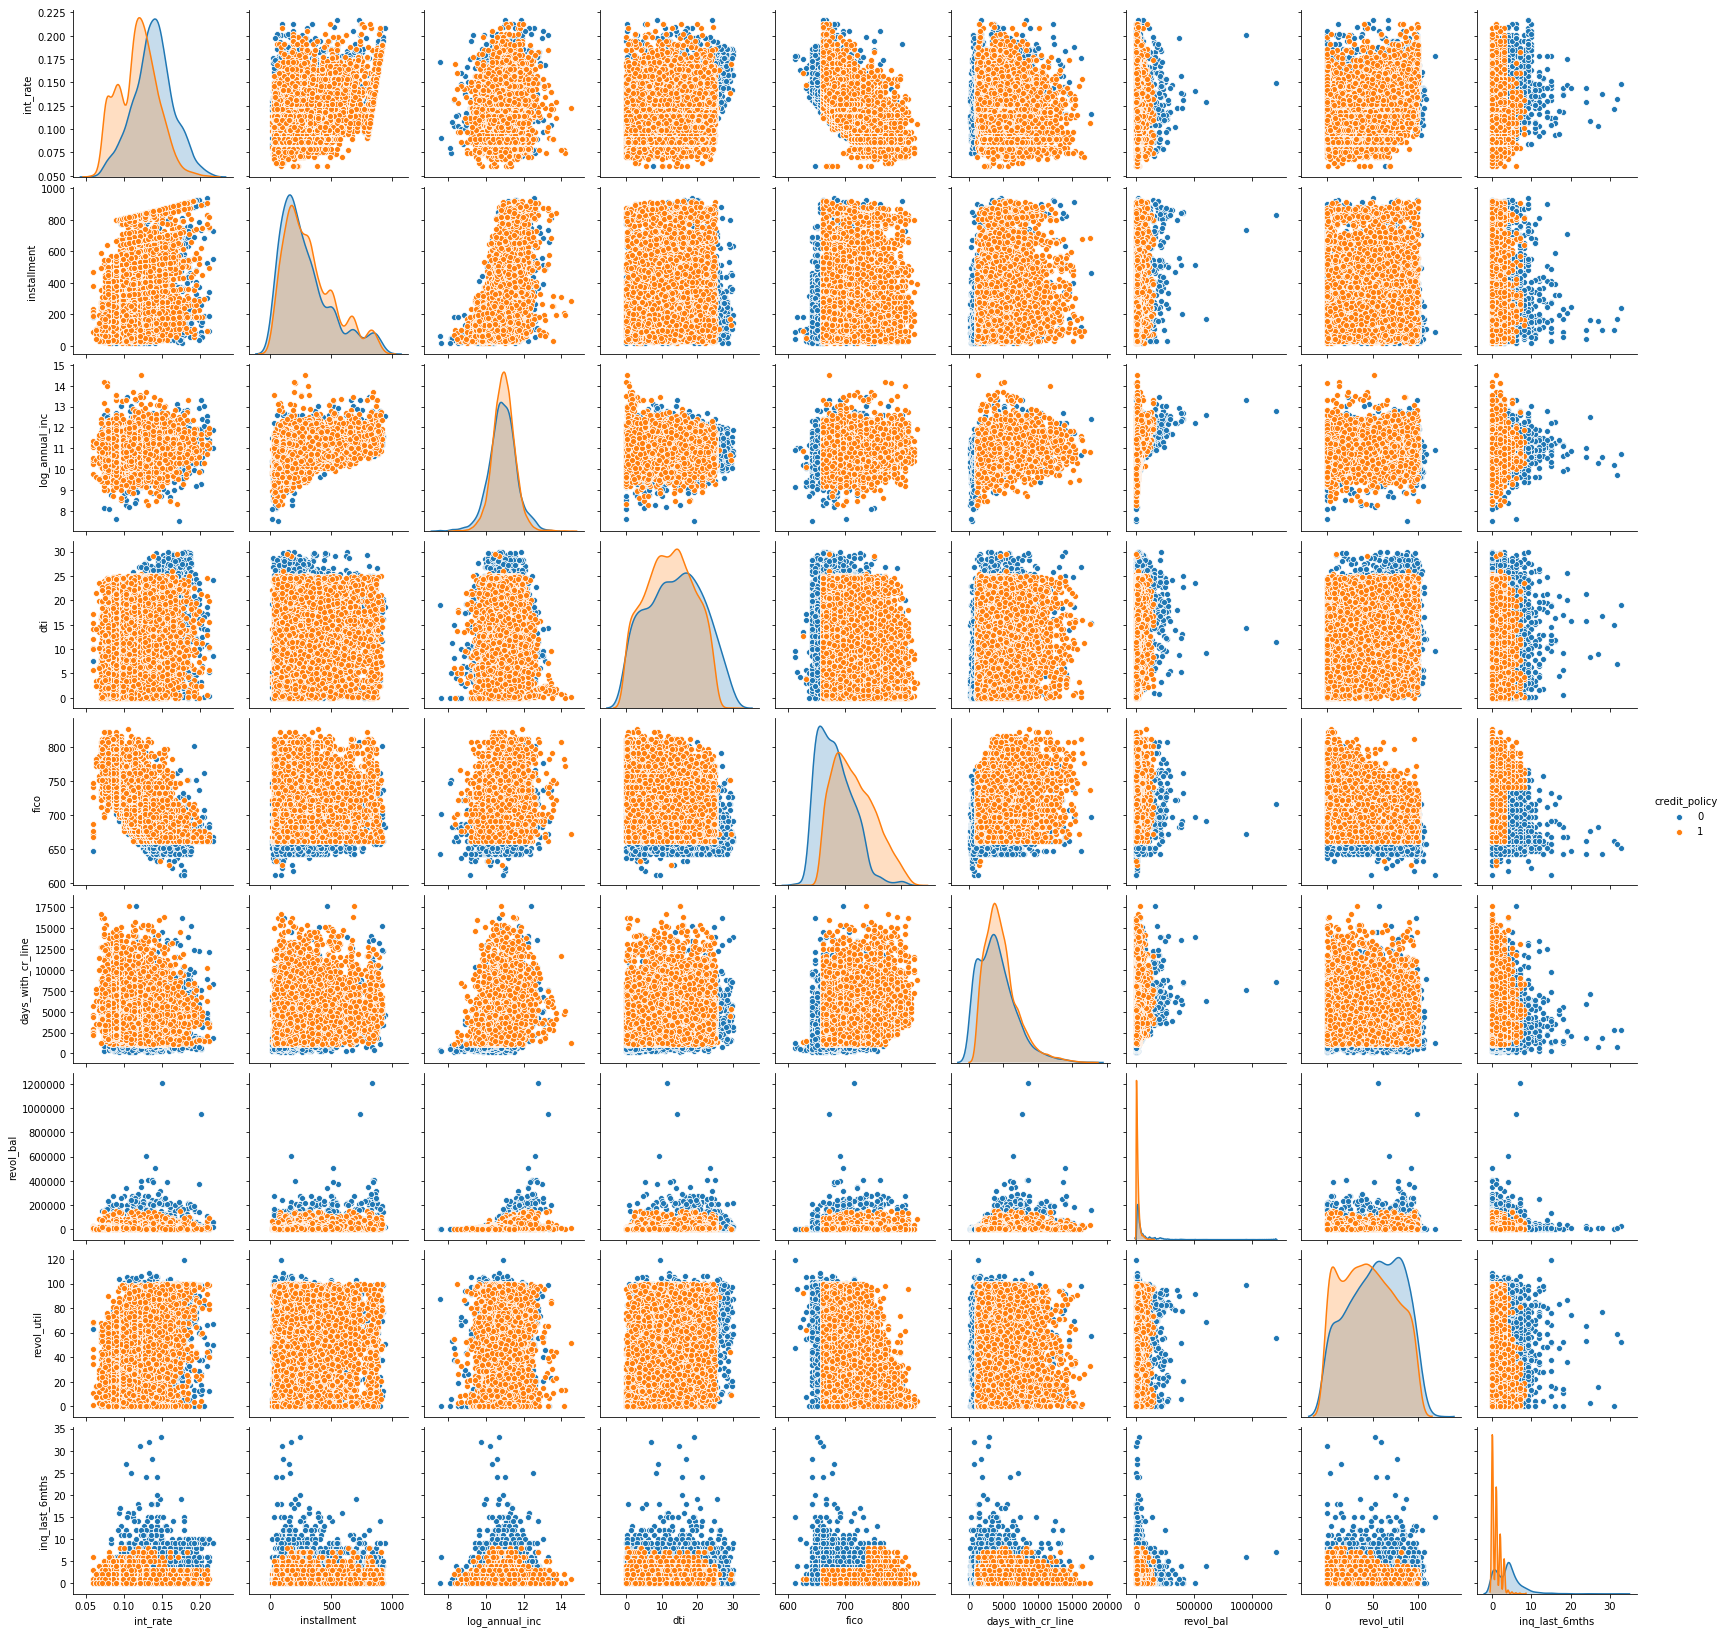

In [15]:
## Construct Pairplot to see the separability of the data between different features.
plt.figure(figsize=(15,7))
sns.pairplot(final_dataSet[['credit_policy','int_rate','installment','log_annual_inc','dti','fico','days_with_cr_line','revol_bal','revol_util','inq_last_6mths']],hue='credit_policy',kind='scatter')
plt.show()

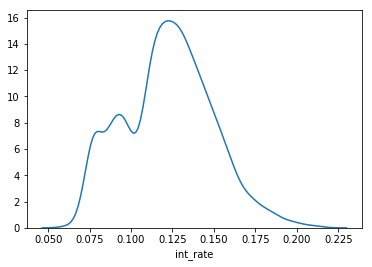

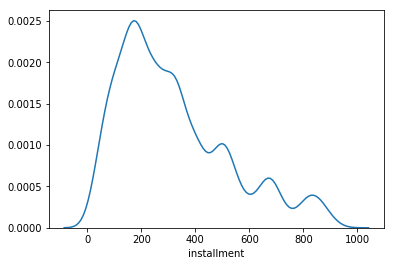

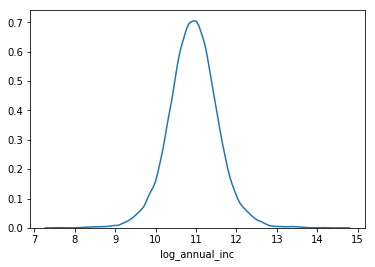

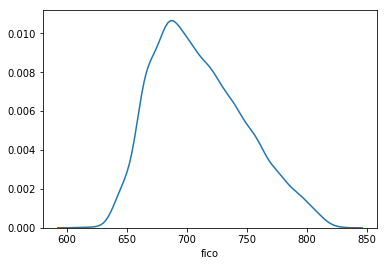

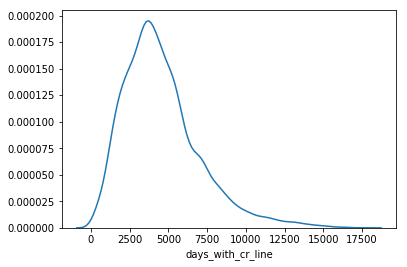

In [16]:
# Check how data is distributed for each features
columns=['int_rate','installment','log_annual_inc','dti','fico','days_with_cr_line','revol_bal','revol_util']
for i in columns:

    sns.distplot(final_dataSet[i],hist=False)
    plt.show()
# From below visuals it seems that data scaling and standardization is necessary
# It may also be noted that Outlier treatment may not be necessary at this point.

### Feature Engineering

In [12]:
#Perform Correlation Analysis.
#check the correlation between features and will drop those features which have a strong correlation
final_dataSet.corr()

credit_policy  int_rate  installment  log_annual_inc  \
credit_policy            1.000000 -0.294089     0.058770        0.034906   
int_rate                -0.294089  1.000000     0.276140        0.056383   
installment              0.058770  0.276140     1.000000        0.448102   
log_annual_inc           0.034906  0.056383     0.448102        1.000000   
dti                     -0.090901  0.220006     0.050202       -0.054065   
fico                     0.348319 -0.714821     0.086039        0.114576   
days_with_cr_line        0.099026 -0.124022     0.183297        0.336896   
revol_bal               -0.187518  0.092527     0.233625        0.372140   
revol_util              -0.104095  0.464837     0.081356        0.054881   
inq_last_6mths          -0.535511  0.202780    -0.010419        0.029171   
delinq_2yrs             -0.076318  0.156079    -0.004368        0.029203   
pub_rec                 -0.054243  0.098162    -0.032760        0.016506   
not_fully_paid          -0.158119  0.159552     0.049955       -0.033439   
all_other               -0.025412 -0.124000    -0.203103       -0.080077   
credit_card              0.003216 -0.042109     0.000774        0.072942   
debt_consolidation       0.020193  0.123607     0.161658       -0.026214   
educational             -0.031346 -0.019618    -0.094510       -0.119799   
home_improvement         0.006036 -0.050697     0.023024        0.116375   
major_purchase           0.024281 -0.068978    -0.079836       -0.031020   
small_business          -0.003511  0.151247     0.145654        0.091540   

                         dti      fico  days_with_cr_line  revol_bal  \
credit_policy      -0.090901  0.348319           0.099026  -0.187518   
int_rate            0.220006 -0.714821          -0.124022   0.092527   
installment         0.050202  0.086039           0.183297   0.233625   
log_annual_inc     -0.054065  0.114576           0.336896   0.372140   
dti                 1.000000 -0.241191           0.060101   0.188748   
fico               -0.241191  1.000000           0.263880  -0.015553   
days_with_cr_line   0.060101  0.263880           1.000000   0.229344   
revol_bal           0.188748 -0.015553           0.229344   1.000000   
revol_util          0.337109 -0.541289          -0.024239   0.203779   
inq_last_6mths      0.029189 -0.185293          -0.041736   0.022394   
delinq_2yrs        -0.021792 -0.216340           0.081374  -0.033243   
pub_rec             0.006209 -0.147592           0.071826  -0.031010   
not_fully_paid      0.037362 -0.149666          -0.029237   0.053699   
all_other          -0.125825  0.067184          -0.056574  -0.067728   
credit_card         0.084476 -0.012512           0.046220   0.072316   
debt_consolidation  0.179149 -0.154132          -0.009318   0.005785   
educational        -0.035325 -0.013012          -0.042621  -0.034743   
home_improvement   -0.092788  0.097474           0.068087   0.003258   
major_purchase     -0.077719  0.067129          -0.020561  -0.062395   
small_business     -0.069245  0.063292           0.034883   0.083069   

                    revol_util  inq_last_6mths  delinq_2yrs   pub_rec  \
credit_policy        -0.104095       -0.535511    -0.076318 -0.054243   
int_rate              0.464837        0.202780     0.156079  0.098162   
installment           0.081356       -0.010419    -0.004368 -0.032760   
log_annual_inc        0.054881        0.029171     0.029203  0.016506   
dti                   0.337109        0.029189    -0.021792  0.006209   
fico                 -0.541289       -0.185293    -0.216340 -0.147592   
days_with_cr_line    -0.024239       -0.041736     0.081374  0.071826   
revol_bal             0.203779        0.022394    -0.033243 -0.031010   
revol_util            1.000000       -0.013880    -0.042740  0.066717   
inq_last_6mths       -0.013880        1.000000     0.021245  0.072673   
delinq_2yrs          -0.042740        0.021245     1.000000  0.009184   
pub_rec               0.066717    

In [15]:
# Lets plot a heatmap between  relevent features
plt.figure(figsize=(15,6))
sns.heatmap(final_dataSet.corr(),annot=True)


In [ ]:
# Analysis
  # Correlation between int_rate and fico is -71%
  # Correlation between fico and revol_util is -54%%
  # Correlation between debt_consolidation and all_other is -48%
  # Correlation between int_rate and revol_util is 46.5%
  # Correlation between installment and log_annual_inc is 45%
  

### Lets also check the feature importance using Decesion Tree Classifier as well

In [17]:
#Extract features and label
features=final_dataSet.drop(columns='credit_policy')
label=final_dataSet.credit_policy

In [20]:
#Lets also check the feature importance using Decesion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
for i in np.arange(1,50):
    X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=i)
    modelDT=DecisionTreeClassifier()
    modelDT.fit(X_train,y_train)
    train_score=modelDT.score(X_train,y_train)
    test_score=modelDT.score(X_test,y_test)
    if test_score > train_score:
        print('test_score is : {}, train_score is: {} for seed: {}'.format(test_score,train_score,i))
    else:
        print('Its a overfit model: test_score is : {}, train_score is: {} for seed: {}'.format(test_score,train_score,i))


Its a overfit model: test_score is : 0.9911273486430062, train_score is: 1.0 for seed: 1
Its a overfit model: test_score is : 0.9890396659707724, train_score is: 1.0 for seed: 2
Its a overfit model: test_score is : 0.9911273486430062, train_score is: 1.0 for seed: 3
Its a overfit model: test_score is : 0.9921711899791231, train_score is: 1.0 for seed: 4
Its a overfit model: test_score is : 0.9900835073068893, train_score is: 1.0 for seed: 5
Its a overfit model: test_score is : 0.9879958246346555, train_score is: 1.0 for seed: 6
Its a overfit model: test_score is : 0.9906054279749478, train_score is: 1.0 for seed: 7
Its a overfit model: test_score is : 0.9932150313152401, train_score is: 1.0 for seed: 8
Its a overfit model: test_score is : 0.9895615866388309, train_score is: 1.0 for seed: 9
Its a overfit model: test_score is : 0.9921711899791231, train_score is: 1.0 for seed: 10
Its a overfit model: test_score is : 0.9906054279749478, train_score is: 1.0 for seed: 11
Its a overfit model

In [27]:
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=17)
modelDT=DecisionTreeClassifier()
modelDT.fit(X_train,y_train)
modelDT.feature_importances_

array([7.23742406e-03, 5.57717420e-04, 3.28625096e-02, 4.93069700e-02,
       2.91085190e-01, 1.01114829e-01, 8.05317951e-02, 1.15561588e-02,
       4.23692492e-01, 2.02757955e-04, 0.00000000e+00, 0.00000000e+00,
       5.57717420e-04, 3.86112060e-04, 6.69260904e-04, 2.39065313e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [26]:
final_dataSet.drop(columns='credit_policy').columns

Index(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'not_fully_paid', 'all_other', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [ ]:
## As we can see from Decesion tree classifiers below features have no contributions in class separation
  # pub_rec
  # not_fully_paid 
  # home_improvement
  # major_purchase
  # small_business   
## From Correlation Analysis it is also found that  int_rate and fico is highly correlated (-71%)

## CONCLUSION: from above analysis, we will atleast eliminate below features 
    # int_rate
    # home_improvement
    # major_purchase
    # small_business

In [92]:
finalFeatures=final_dataSet.drop(columns=['credit_policy','int_rate','home_improvement','major_purchase','small_business'])
label=final_dataSet['credit_policy']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=17)

In [94]:
X_train.shape

(7662, 15)

### Building of deep learning model using Keras with Tensorflow

In [32]:
import tensorflow as tf

In [95]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
# Create Input layer
model.add(tf.keras.layers.Reshape((15,),input_shape=(15,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [96]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [97]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05)
#Compile the model with sgd optimizer
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Compile the model with adam optimizer
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [98]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=200,
          batch_size=25)

Train on 7662 samples, validate on 1916 samples
Epoch 1/200
7662/7662 [==============================] - 2s 278us/sample - loss: 0.3243 - accuracy: 0.8643 - val_loss: 0.3306 - val_accuracy: 0.8617
Epoch 2/200
7662/7662 [==============================] - 1s 104us/sample - loss: 0.2652 - accuracy: 0.8849 - val_loss: 0.2245 - val_accuracy: 0.9034
Epoch 3/200
7662/7662 [==============================] - 1s 103us/sample - loss: 0.2545 - accuracy: 0.8905 - val_loss: 0.2056 - val_accuracy: 0.9170
Epoch 4/200
7662/7662 [==============================] - 1s 103us/sample - loss: 0.2377 - accuracy: 0.8986 - val_loss: 0.2028 - val_accuracy: 0.9144
Epoch 5/200
7662/7662 [==============================] - 1s 103us/sample - loss: 0.2264 - accuracy: 0.9042 - val_loss: 0.1812 - val_accuracy: 0.9285
Epoch 6/200
7662/7662 [==============================] - 1s 103us/sample - loss: 0.2205 - accuracy: 0.9062 - val_loss: 0.1828 - val_accuracy: 0.9264
Epoch 7/200
7662/7662 [==============================] - 1

In [ ]:
#With SGD and lr=0.05
     # loss: 0.1364 - accuracy: 0.9468 - val_loss: 0.3102 - val_accuracy: 0.8961

#with adam optimizer
     # loss: 0.1236 - accuracy: 0.9504 - val_loss: 0.3208 - val_accuracy: 0.8883

#Summary and Conclusion:
#After having performed various combinations of hyper parameter tuning its seen that the model training accuracy has been around 95% whereas testing/validation accuracy has been around 89 to 90 %.
#There is still scope for improvement. May be more feature engineering approaches such as RFE, Aanalysis of variance, Select by Model and other feature importance approaches. Even PCA can be used to reduce the number of features



### Summary and Conclusion

##After having performed various combinations of hyper parameter tuning its seen that the model training accuracy has been around 95% whereas testing/validation accuracy has been around 89 to 90 %.
#There is still scope for improvement. May be more feature engineering approaches such as RFE, Aanalysis of variance, Select by Model and other feature importance approaches. Even PCA can be used to reduce the number of features
